In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Measures

In [2]:
df = pd.read_csv('results_measures.csv')

In [8]:
df.head()

,Res,Noise_Param,Scale_Param,Distances_Classic,Distances_Noised,Ratios_EMD,Distances_Linear,Distances_Linear_Noised,Ratios_Linear,Cumsum_Classic,Cumsum_Noised,Ratios_emd_cumsum
0,100.0,0.001000,100.0,0.299855,0.300967,0.996473,0.225836,0.226591,0.996702,29.685607,29.795761,0.010101
1,100.0,0.001000,200.0,0.299855,0.300332,0.998579,0.225836,0.226123,0.998774,29.685607,29.732903,0.010101
2,100.0,0.001000,500.0,0.299855,0.300160,0.999171,0.225836,0.226167,0.998574,29.685607,29.715872,0.010101
3,100.0,0.001000,1000.0,0.299855,0.299988,0.999677,0.225836,0.226047,0.999101,29.685607,29.698804,0.010101
4,100.0,0.001551,100.0,0.299855,0.301007,0.996500,0.225836,0.227232,0.993921,29.685607,29.799657,0.010101


In [9]:
unique_res = df['Res'].unique()
unique_scale = df['Scale_Param'].unique()

## Distance vs CumSum

These graphs should show the same thing, not sure why it's not working right now

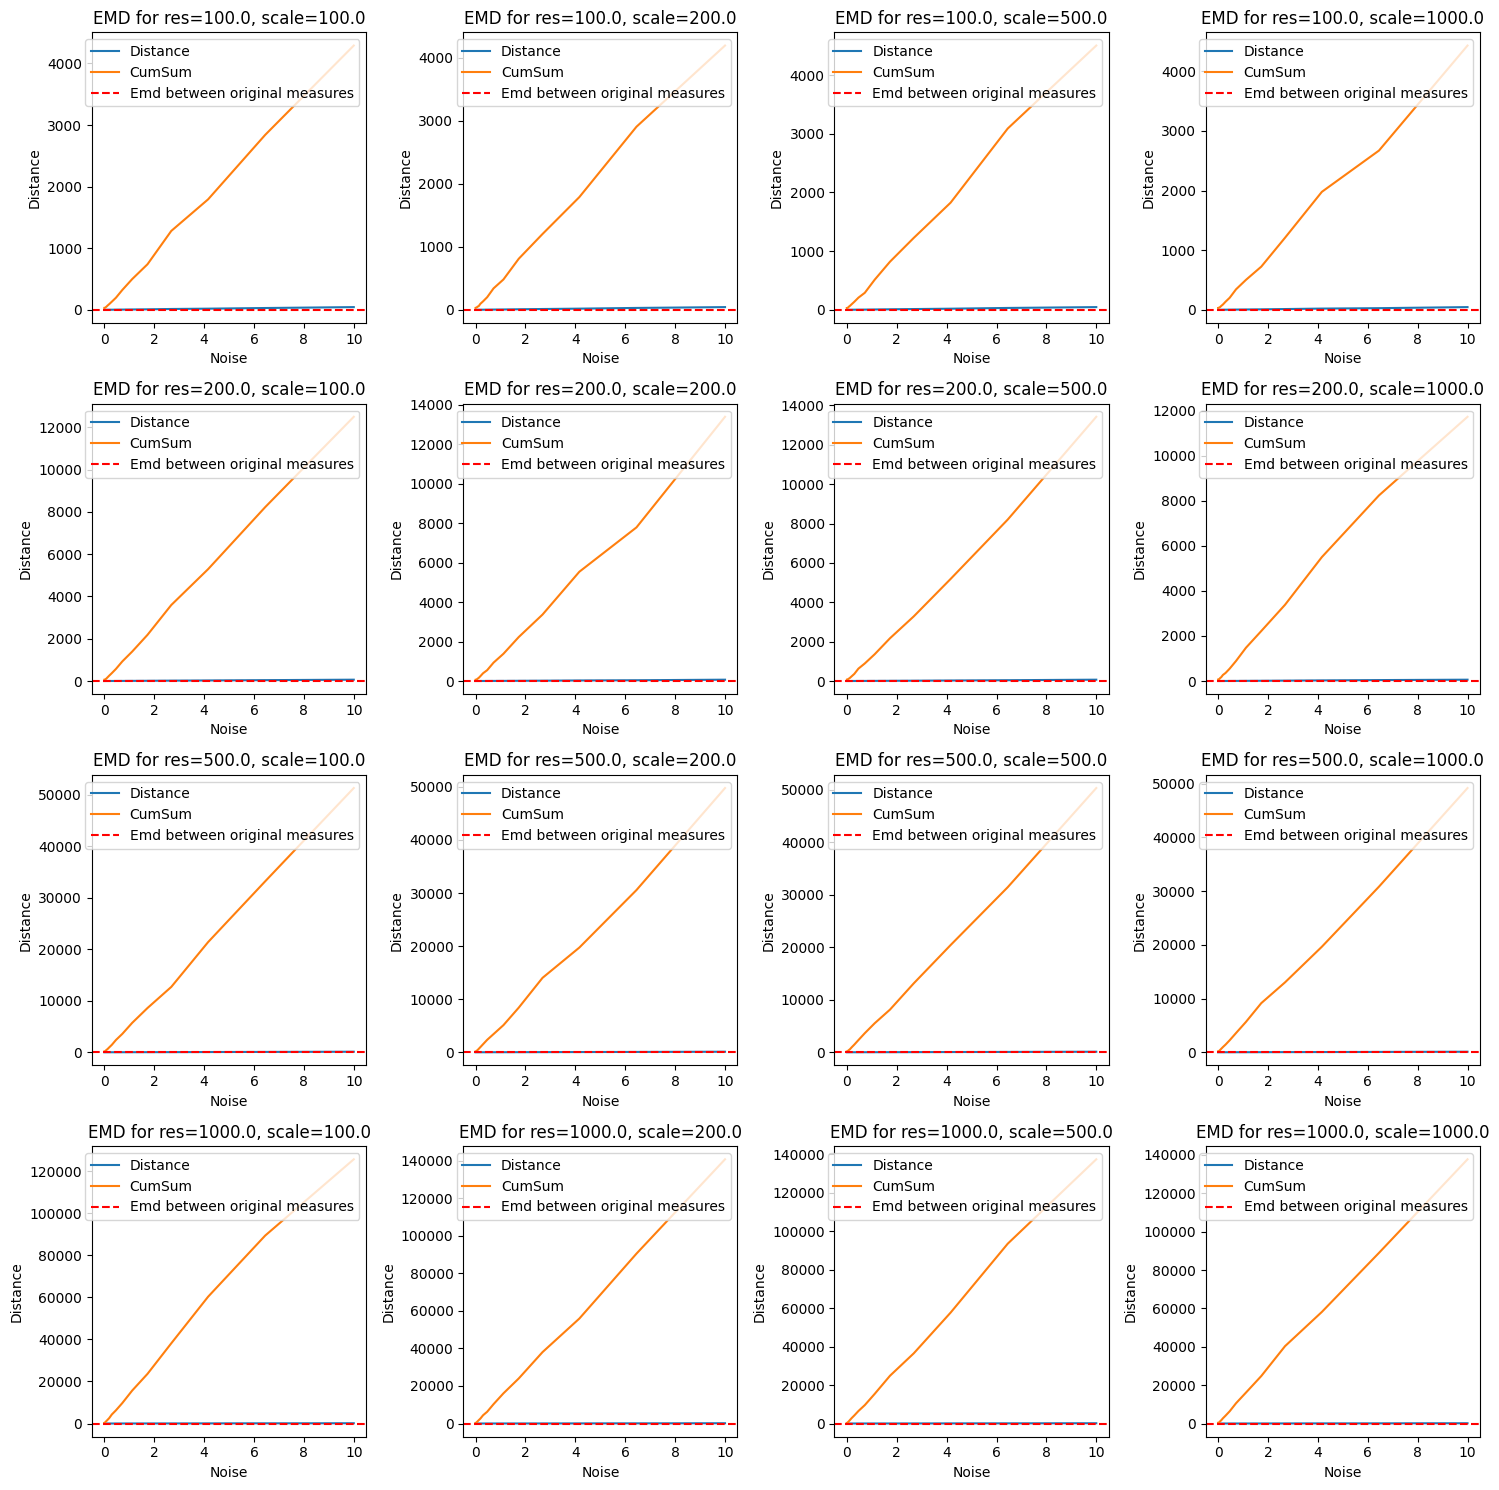

In [20]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, res_option in enumerate(unique_res):
    for j, scale_option in enumerate(unique_scale):

        # Filter the dataframe based on current 'res' and 'scale' options
        filtered_df = df[(df['Res'] == res_option) & (df['Scale_Param'] == scale_option)]

        ax = axs[i, j]
        ax.plot(filtered_df['Noise_Param'], filtered_df['Distances_Noised'], label='Distance')
        ax.plot(filtered_df['Noise_Param'], filtered_df['Cumsum_Noised'], label='CumSum')
        # ax.set_xscale('log')
        ax.set_title(f'EMD for res={res_option}, scale={scale_option}')
        ax.set_xlabel('Noise')
        ax.set_ylabel('Distance')
        ax.axhline(y=filtered_df['Distances_Classic'].iloc[0], color='r', linestyle='--', label='Emd between original measures')
        ax.legend()

plt.tight_layout()
plt.show()

## Ratios Graph

This graph shows how the EMD metric performs better than the linear (Ratios closer to 1 for larger values of noise) throughout different values of res and scale

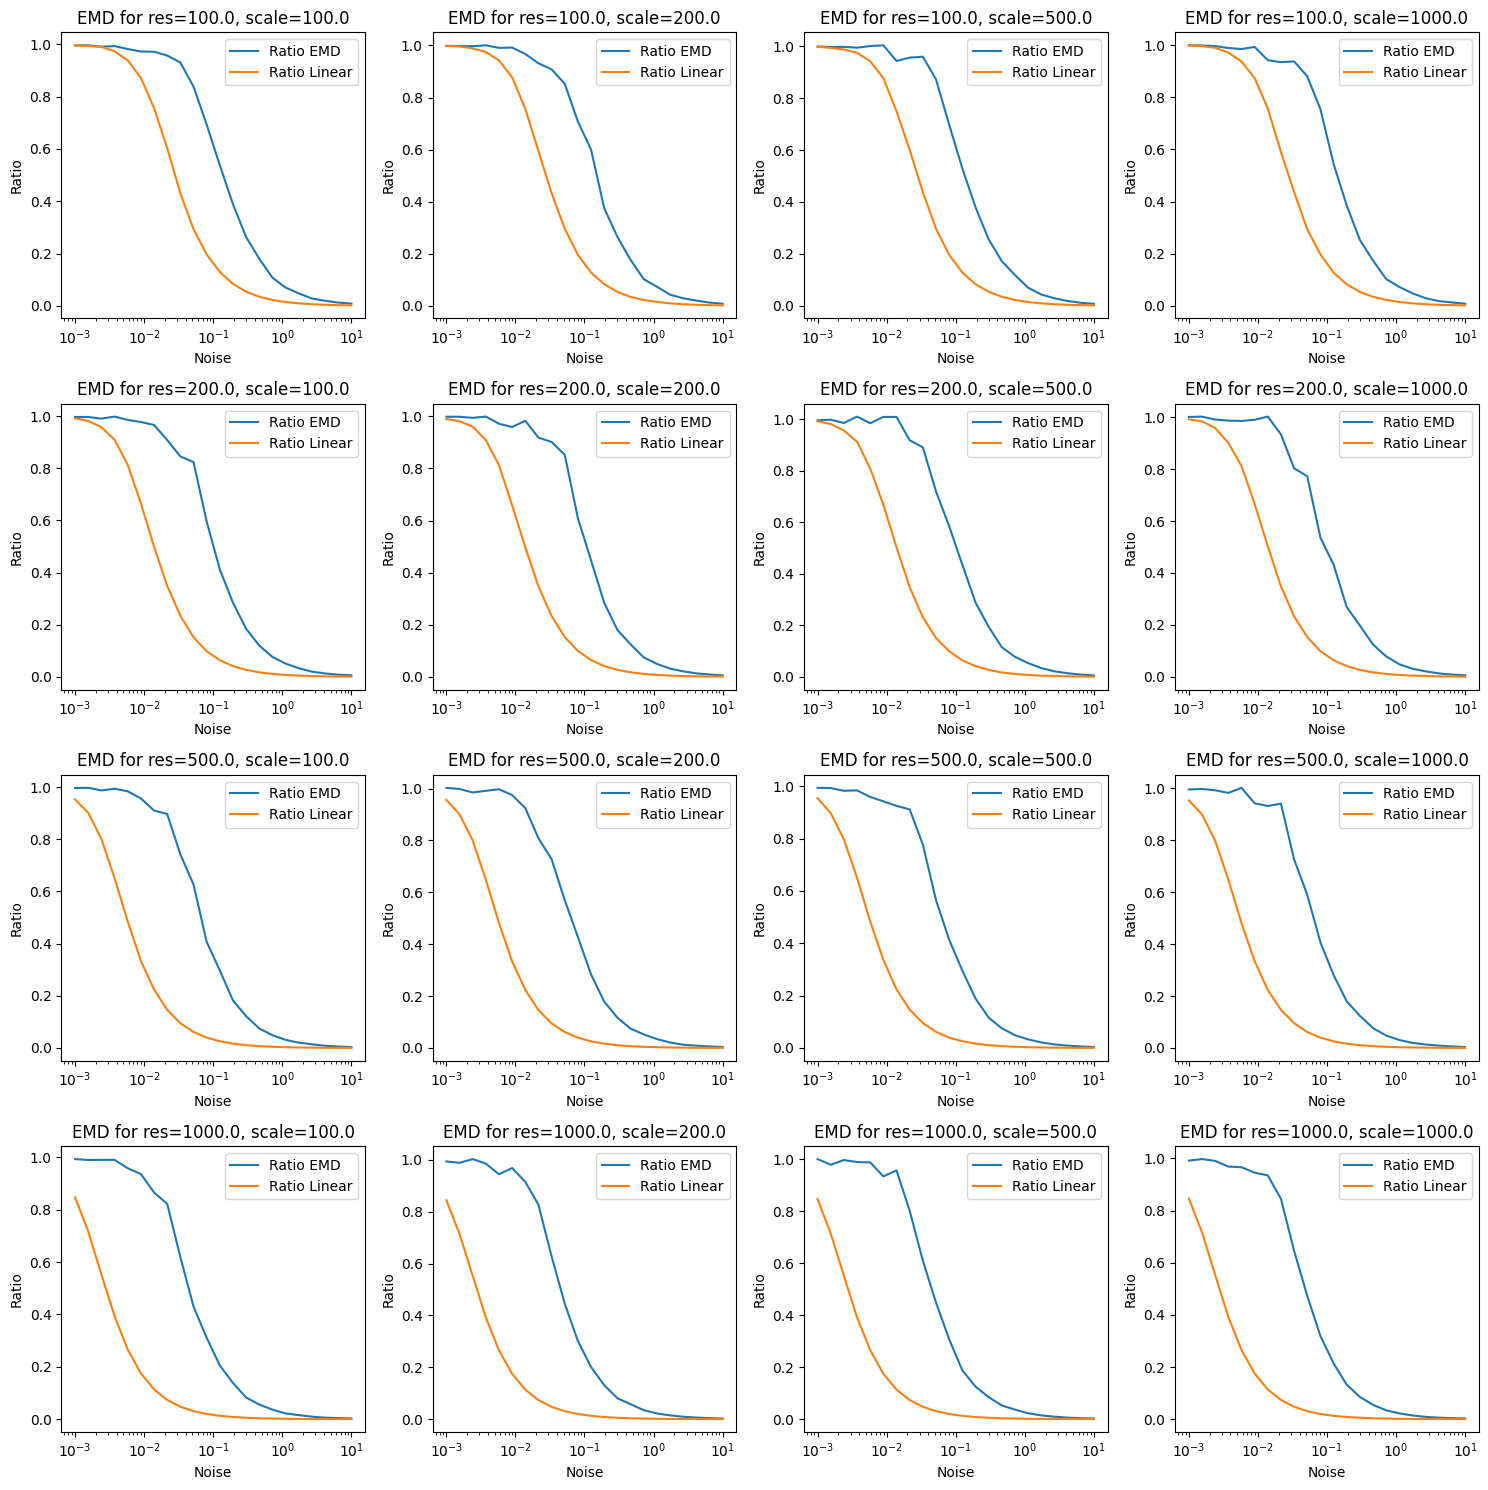

In [23]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, res_option in enumerate(unique_res):
    for j, scale_option in enumerate(unique_scale):

        # Filter the dataframe based on current 'res' and 'scale' options
        filtered_df = df[(df['Res'] == res_option) & (df['Scale_Param'] == scale_option)]

        ax = axs[i, j]
        ax.plot(filtered_df['Noise_Param'], filtered_df['Ratios_EMD'], label='Ratio EMD')
        ax.plot(filtered_df['Noise_Param'], filtered_df['Ratios_Linear'], label='Ratio Linear')
        ax.set_xscale('log')
        ax.set_title(f'EMD for res={res_option}, scale={scale_option}')
        ax.set_xlabel('Noise')
        ax.set_ylabel('Ratio')
        ax.legend()

plt.tight_layout()
plt.show()

# Images

In [24]:
df = pd.read_csv('results_images.csv')

In [28]:
df.head()

,Noise_Param,Distances_Classic,Distances_Noised,Ratios_EMD,Distances_Linear,Distances_Linear_Noised,Ratios_Linear,Im_Size
0,0.001000,33.941125,33.979976,0.998858,2.828427,2.828466,0.999987,10
1,0.048571,33.941125,35.772415,0.950429,2.828427,2.911264,0.972021,10
2,0.096143,33.941125,37.253414,0.917385,2.828427,3.141371,0.901809,10
3,0.143714,33.941125,40.296591,0.857230,2.828427,3.494957,0.812060,10
4,0.191286,33.941125,41.250190,0.844509,2.828427,3.903364,0.727781,10


## Imsize effect

In [26]:
labels = ['10', '20', '50', '100']

# Split and label
for idx, label in enumerate(labels):
    start_idx = idx * 22
    end_idx = start_idx + 22
    df.loc[start_idx:end_idx-1, 'Im_Size'] = label

C:\Users\eriki\AppData\Local\Temp\ipykernel_17576\1530812326.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[start_idx:end_idx-1, 'Im_Size'] = label


In [31]:
df[df['Im_Size'] == '10']

,Noise_Param,Distances_Classic,Distances_Noised,Ratios_EMD,Distances_Linear,Distances_Linear_Noised,Ratios_Linear,Im_Size
0,0.001000,33.941125,33.979976,0.998858,2.828427,2.828466,0.999987,10
1,0.048571,33.941125,35.772415,0.950429,2.828427,2.911264,0.972021,10
2,0.096143,33.941125,37.253414,0.917385,2.828427,3.141371,0.901809,10
3,0.143714,33.941125,40.296591,0.857230,2.828427,3.494957,0.812060,10
4,0.191286,33.941125,41.250190,0.844509,2.828427,3.903364,0.727781,10
5,0.238857,33.941125,44.701577,0.782262,2.828427,4.486400,0.632560,10
6,0.286429,33.941125,46.342382,0.753725,2.828427,4.937379,0.574808,10
7,0.334000,33.941125,47.373557,0.742490,2.828427,5.429501,0.523424,10
8,0.381571,33.941125,50.602528,0.695833,2.828427,6.023989,0.471820,10
9,0.429143,33.941125,55.536047,0.638796,2.828427,6.747137,0.421341,10


In [32]:
labels

['10', '20', '50', '100']

In [35]:
for idx, im_size_val in enumerate(labels):
    print(idx)

0
1
2
3


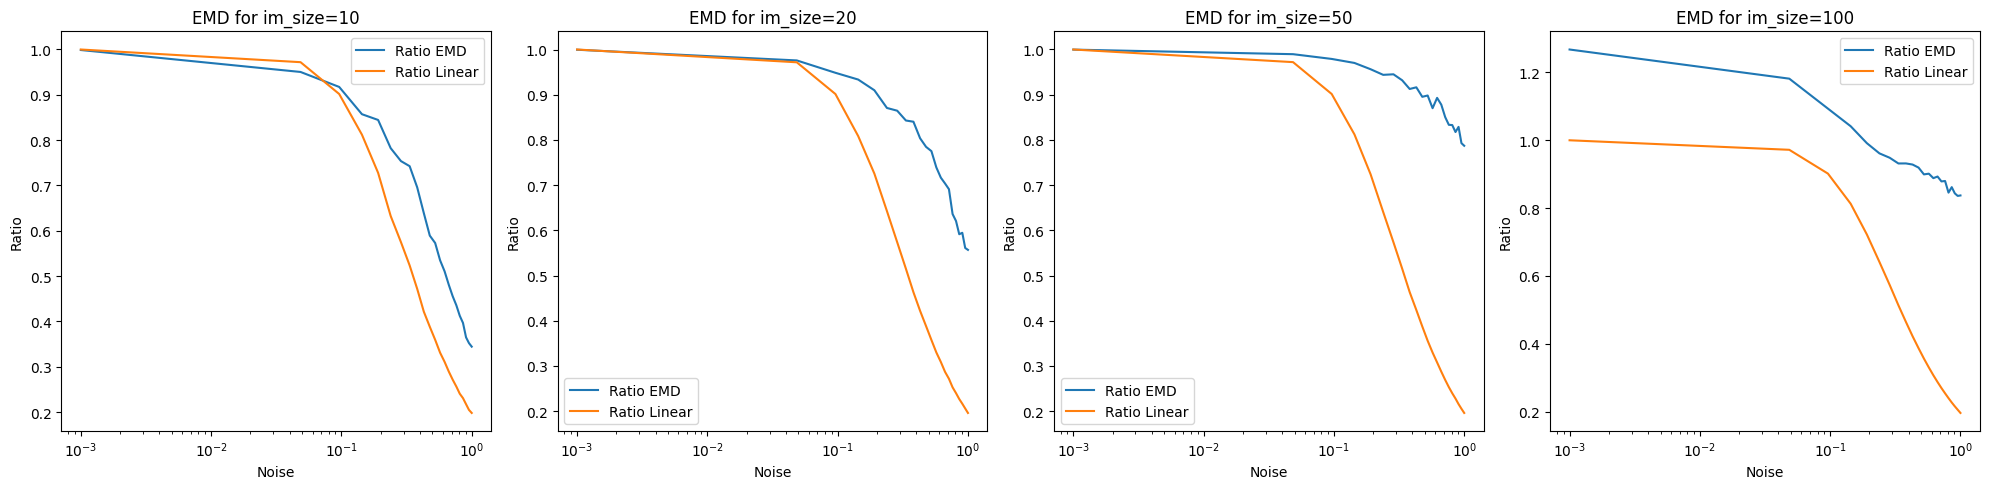

In [37]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs = axs.ravel()

for idx, im_size_val in enumerate(labels):
    ax = axs[idx]
    
    filtered_df = df[df['Im_Size'] == im_size_val]

    ax.plot(filtered_df['Noise_Param'], filtered_df['Ratios_EMD'], label='Ratio EMD')
    ax.plot(filtered_df['Noise_Param'], filtered_df['Ratios_Linear'], label='Ratio Linear')
    ax.set_xscale('log')
    ax.set_title(f'EMD for im_size={im_size_val}')
    ax.set_xlabel('Noise')
    ax.set_ylabel('Ratio')
    ax.legend()

plt.tight_layout()
plt.show()